In [1]:
from sklearn.datasets import load_iris #从sklearn中导入鸢尾花的数据集
iris = load_iris()
#print(iris['DESCR']) #输出iris鸢尾花数据集的描述

In [2]:
ir = iris['data']
#根据6.2的描述，第1步我们只需要花瓣长度(petal length)和花瓣宽度(petal width)两个特征
data = ir[:,[0,1,2,3]]
#print (data)
label = iris.target
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#两点之间的计算欧式距离
def distance(a,b): 
    return np.sqrt(np.sum((a-b)**2))

In [18]:
#随机选择K个质心
def center(dataset,k):
    n = dataset.shape[1] #获取特征的维数    
    centroids = np.empty((k,n)) #生成一个k*n的矩阵，用于存储质心
    for i in range(n):
        rangemin, rangemax = np.min(dataset[:,i]), np.max(dataset[:,i])
        centroids[:,i] = rangemin + float(rangemax - rangemin) * np.random.rand(k)
        #让随机数都在给定的数据范围之内
    return centroids

In [19]:
# 让质心位置迭代耦合
n = data.shape[0]
m = data.shape[1]
k = 3
clusterAssment = np.zeros((n,2)) #设定一个矩阵，用来记录label和distance^2
centroids = center(data, k)
def kmeans (dataset, k):
    clusterChanged = True   #定义clusterChanged用来进行耦合，最终该值不再变化
    while clusterChanged:   #当clusterChanged不再变化时，循环停止
        clusterChanged = False
        for i in range(n):
            dist_min = np.inf #初始化最小距离为无限大
            fitlabel = -1 #初始化类值为-1
            for j in range(k): #寻找最近质心
                dist = distance(dataset[i],centroids[j])
                if dist < dist_min:
                    dist_min = dist #更新最小距离
                    fitlabel = j    #更新类值
            if clusterAssment[i,0] != fitlabel:
                clusterChanged = True
            clusterAssment[i,:] = fitlabel, dist_min**2
        for l in range(k): #更新质心，将每个蔟中数据点的均值作为质心坐标
            fitlabel_all = clusterAssment[:,0] 
            value = np.nonzero(fitlabel_all == l)
            sampleInClust = dataset[value[0]]
            centroids[l] = np.mean(sampleInClust, axis=0) 
    return centroids, clusterAssment

In [6]:
kmeans(data, k)
data0 = data[clusterAssment[:,0]==0]
data1 = data[clusterAssment[:,0]==1]
data2 = data[clusterAssment[:,0]==2]

In [7]:
#统计聚类结果中不同类别花的数量
#在数据data0中各种不同类别花数量的比例
fitlabel_all = clusterAssment[:,0]
value = np.nonzero(fitlabel_all == 0)
a_list = iris.target[value[0]]
print(len(a_list))
i = 0
se0 = 0
ve0 = 0
vi0 = 0
for i in range(len(a_list)):
    if a_list[i] == 0: se0 += 1
    elif a_list[i] == 1: ve0 += 1
    else: vi0 += 1
    
se_percent = (se0/len(a_list))*100
ve_percent = (ve0/len(a_list))*100
vi_percent = (vi0/len(a_list))*100
print (se_percent,ve_percent,vi_percent)

61
0.0 77.04918032786885 22.950819672131146


<function matplotlib.pyplot.show>

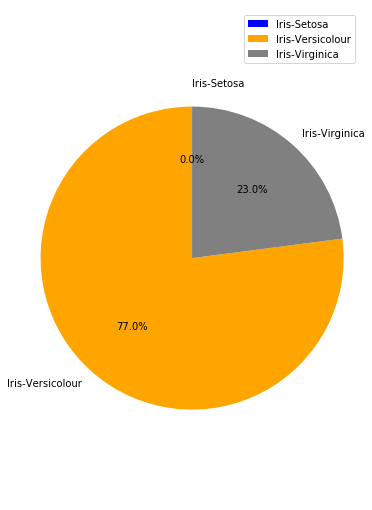

In [8]:
plt.figure(figsize=(6,9))
labels = [u'Iris-Setosa',u'Iris-Versicolour',u'Iris-Virginica']
#Iris-Setosa 山鸢尾
#Iris-Versicolour 杂色鸢尾
#Iris-Virginica 维吉尼亚鸢尾
sizes = [se_percent,ve_percent,vi_percent]
colors = ['blue','orange','gray']
explode = (0.05,0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.show

In [9]:
#统计聚类结果中不同类别花的数量
#在数据data1中各种不同类别花数量的比例
fitlabel_all = clusterAssment[:,0]
value = np.nonzero(fitlabel_all == 1)
b_list = iris.target[value[0]]
print(len(b_list))
i = 0
se1 = 0
ve1 = 0
vi1 = 0
for i in range(len(b_list)):
    if b_list[i] == 0: se1 += 1
    elif b_list[i] == 1: ve1 += 1
    else: vi1 += 1
    
se_percent = (se1/len(b_list))*100
ve_percent = (ve1/len(b_list))*100
vi_percent = (vi1/len(b_list))*100
print (se_percent,ve_percent,vi_percent)

39
0.0 7.6923076923076925 92.3076923076923


<function matplotlib.pyplot.show>

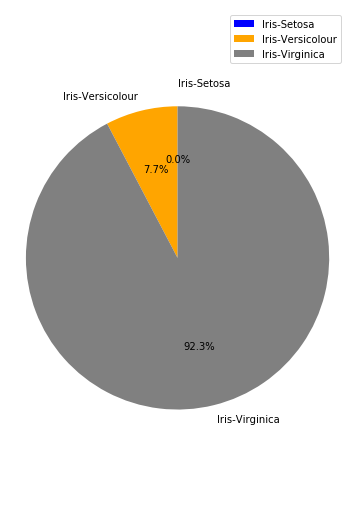

In [10]:
plt.figure(figsize=(6,9))
labels = [u'Iris-Setosa',u'Iris-Versicolour',u'Iris-Virginica']
#Iris-Setosa 山鸢尾
#Iris-Versicolour 杂色鸢尾
#Iris-Virginica 维吉尼亚鸢尾
sizes = [se_percent,ve_percent,vi_percent]
colors = ['blue','orange','gray']
explode = (0.05,0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.show

In [11]:
#在数据data0中各种不同类别花数量的比例
fitlabel_all = clusterAssment[:,0]
value = np.nonzero(fitlabel_all == 2)
c_list = iris.target[value[0]]
print(len(c_list))
i = 0
se2 = 0
ve2 = 0
vi2 = 0
for i in range(len(c_list)):
    if c_list[i] == 0: se2 += 1
    elif c_list[i] == 1: ve2 += 1
    else: vi2 += 1
    
se_percent = (se2/len(c_list))*100
ve_percent = (ve2/len(c_list))*100
vi_percent = (vi2/len(c_list))*100
print (se_percent,ve_percent,vi_percent)

50
100.0 0.0 0.0


<function matplotlib.pyplot.show>

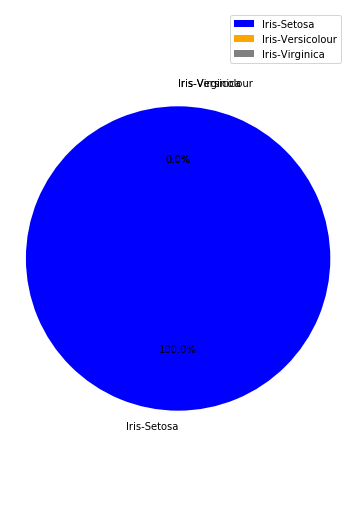

In [12]:
plt.figure(figsize=(6,9))
labels = [u'Iris-Setosa',u'Iris-Versicolour',u'Iris-Virginica']
#Iris-Setosa 山鸢尾
#Iris-Versicolour 杂色鸢尾
#Iris-Virginica 维吉尼亚鸢尾
sizes = [se_percent,ve_percent,vi_percent]
colors = ['blue','orange','gray']
explode = (0.05,0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.show